In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib 연습

In [177]:
data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='euc-kr')
# data.head().T

## 교통사고 다발 시간대 시각화

0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23 8개의 구간으로 나누어서 진행

In [178]:
data.발생년월일시.head()

0    2017010101
1    2017010102
2    2017010102
3    2017010102
4    2017010104
Name: 발생년월일시, dtype: int64

In [179]:
t = [x % 100 for x in data['발생년월일시']]

time_df = pd.DataFrame(t, columns=['사고시간'])
time_df.head()

,사고시간
0,1
1,2
2,2
3,2
4,4


In [180]:
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']

cats = pd.cut(time_df['사고시간'], bins, labels=labels)
res = cats.value_counts().sort_index()
res

0-2      359
3-5      535
6-8      441
9-11     496
12-14    513
15-17    639
18-20    590
21-23    325
Name: 사고시간, dtype: int64

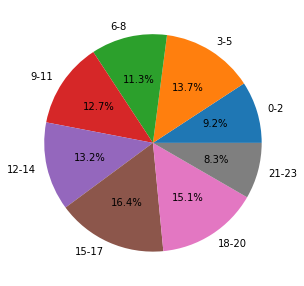

In [181]:
plt.figure(figsize=(5, 5))
plt.pie(res, labels=labels, autopct='%1.1f%%')
plt.show()

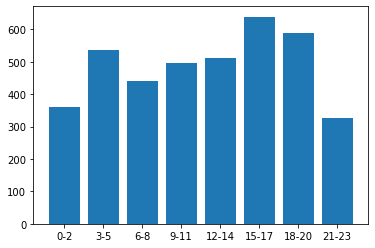

In [182]:
plt.bar(labels, res)
plt.show()

# 지도 그리기

In [183]:
import folium
import pandas as pd

In [184]:
# 데이터 가져오기
data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='euc-kr')

In [185]:
# 서울 지도 보이게 하기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# seoul_map

In [186]:
# 마커 표시
m = data[['발생년월일시','발생지시도', '경도', '위도']][data['발생지시도'] == '서울']
m.head()

,발생년월일시,발생지시도,경도,위도
1,2017010102,서울,127.133107,37.498741
4,2017010104,서울,126.898094,37.472946
12,2017010204,서울,126.915444,37.619097
16,2017010208,서울,126.897739,37.487492
20,2017010217,서울,126.903492,37.443959


In [187]:
# 이름, 위도, 경도
for name, lat, lng in zip(m.발생년월일시, m.위도, m.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map

In [188]:
# 광주

data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding='euc-kr')

gj_map = folium.Map(location=[35.18, 126.89], zoom_start=12)

m = data[['발생년월일시','발생지시도', '경도', '위도']][data['발생지시도'] == '광주']

for name, lat, lng in zip(m.발생년월일시, m.위도, m.경도):
    folium.Marker([lat, lng], popup=name).add_to(gj_map)
gj_map